In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/globalterrorismdb_0522dist.xlsx'
df = pd.read_excel(file_path)
# Preview the data
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (209706, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(54), int64(23), object(57)
memory usage: 216.0+ MB


In [ ]:
df.head()

,region_txt,country_txt,weaptype1_txt,attacktype1,success,suicide,casualties,day_of_year,high_profile_attack
0,Central America & Caribbean,Dominican Republic,Unknown,0,1,0,1.0,183.0,0
1,North America,Mexico,Unknown,5,1,0,0.0,NaN,0
2,Southeast Asia,Philippines,Unknown,0,1,0,1.0,NaN,0
3,Western Europe,Greece,Explosives,2,1,0,0.0,NaN,0
4,East Asia,Japan,Incendiary,6,1,0,0.0,NaN,0


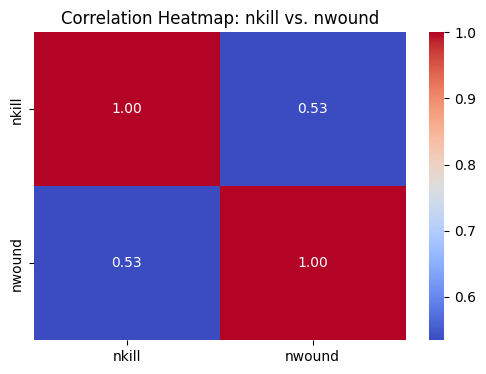

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation Heatmap for 'nkill' and 'nwound'
plt.figure(figsize=(6, 4))  # Adjust size as needed
sns.heatmap(df[['nkill', 'nwound']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: nkill vs. nwound')
plt.show()

In [ ]:
# Drop columns with >50% missing values
missing_thresh = 0.5
df = df.loc[:, df.isnull().mean() < missing_thresh]

# Drop non-informative columns (IDs, summaries, sources etc.)
non_informative = ['eventid', 'approxdate', 'resolution', 'summary', 'source1', 'source2']
df = df.drop(columns=[col for col in non_informative if col in df.columns])

# Impute numeric and categorical values
df['nkill'].fillna(df.groupby('country_txt')['nkill'].transform('median'), inplace=True)
df['nwound'].fillna(df.groupby('country_txt')['nwound'].transform('median'), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)  # For categorical columns


<ipython-input-6-a6758c0c9f6c>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['nkill'].fillna(df.groupby('country_txt')['nkill'].transform('median'), inplace=True)
<ipython-input-6-a6758c0c9f6c>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [ ]:
# Feature Engineering
df['casualties'] = df['nkill'] + df['nwound']
df['day_of_year'] = pd.to_datetime(df[['iyear', 'imonth', 'iday']].rename(columns={
    'iyear': 'year', 'imonth': 'month', 'iday': 'day'
}), errors='coerce').dt.dayofyear
df['high_profile_attack'] = ((df['casualties'] > 10) & (df['gname'] != 'Unknown')).astype(int)

# Final feature selection (around 8-10)
selected_columns = [
    'region_txt', 'country_txt', 'weaptype1_txt', 'attacktype1',
    'success', 'suicide', 'casualties', 'day_of_year', 'high_profile_attack'
]
df = df[selected_columns]


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


le = LabelEncoder()
df['attacktype1'] = le.fit_transform(df['attacktype1'])


X = df.drop(columns='attacktype1')
y = df['attacktype1']

# Preprocessing
num_features = ['casualties', 'day_of_year']
cat_features = ['region_txt', 'country_txt', 'weaptype1_txt']
bin_features = ['success', 'suicide', 'high_profile_attack']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features),
    ('bin', 'passthrough', bin_features)
])


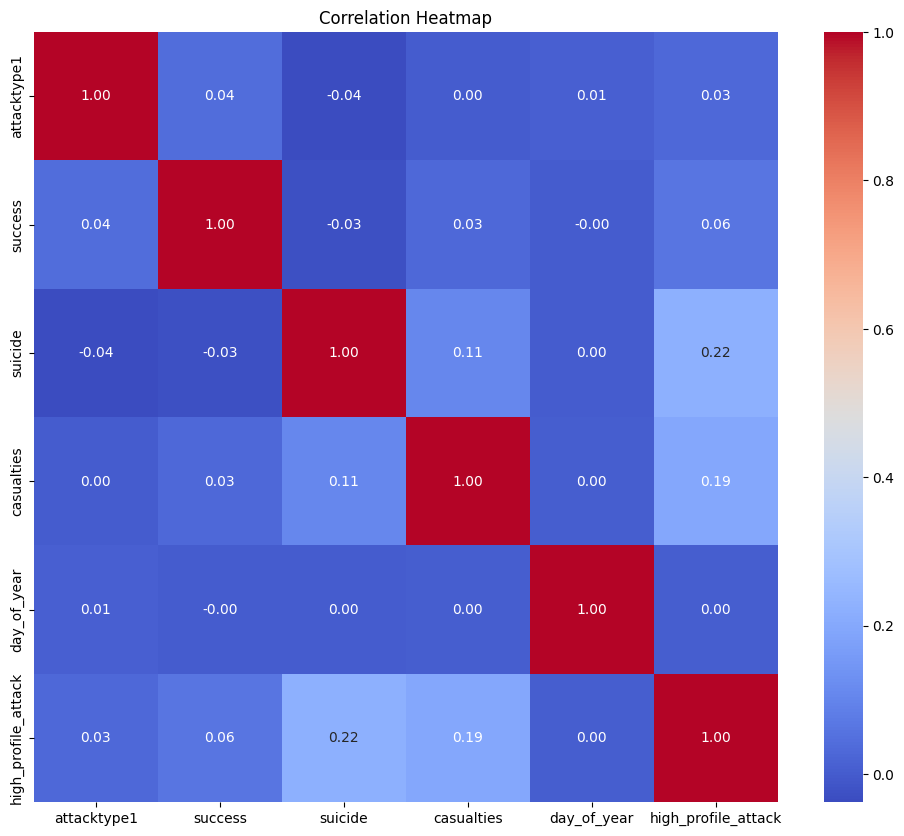

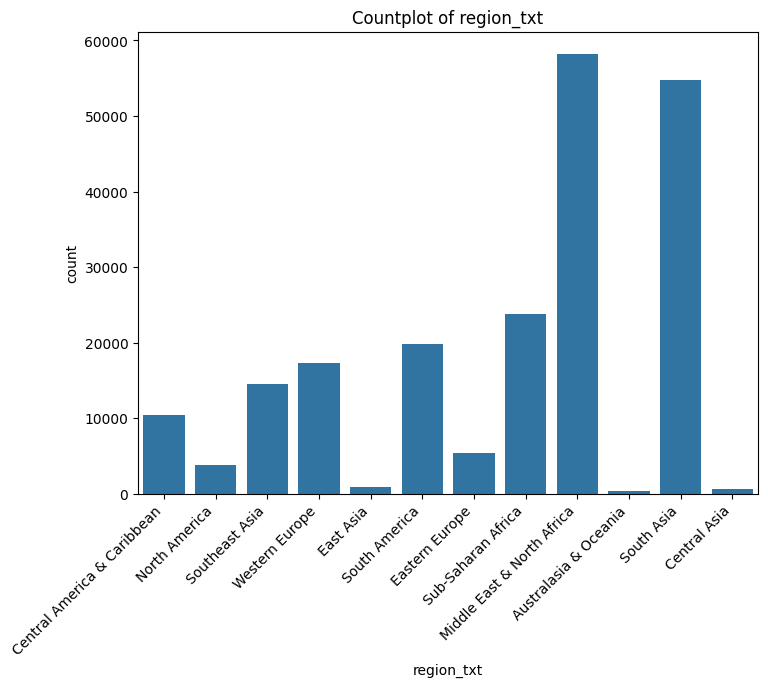

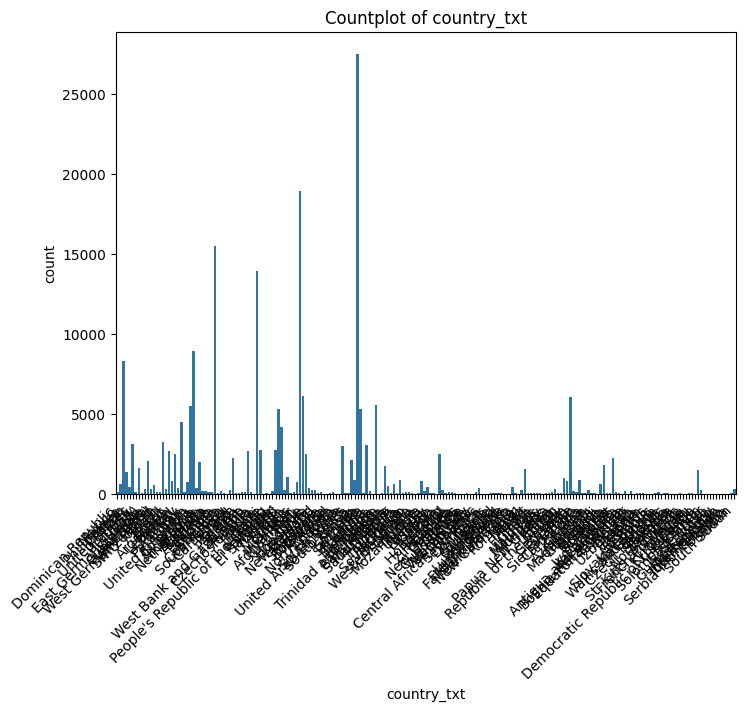

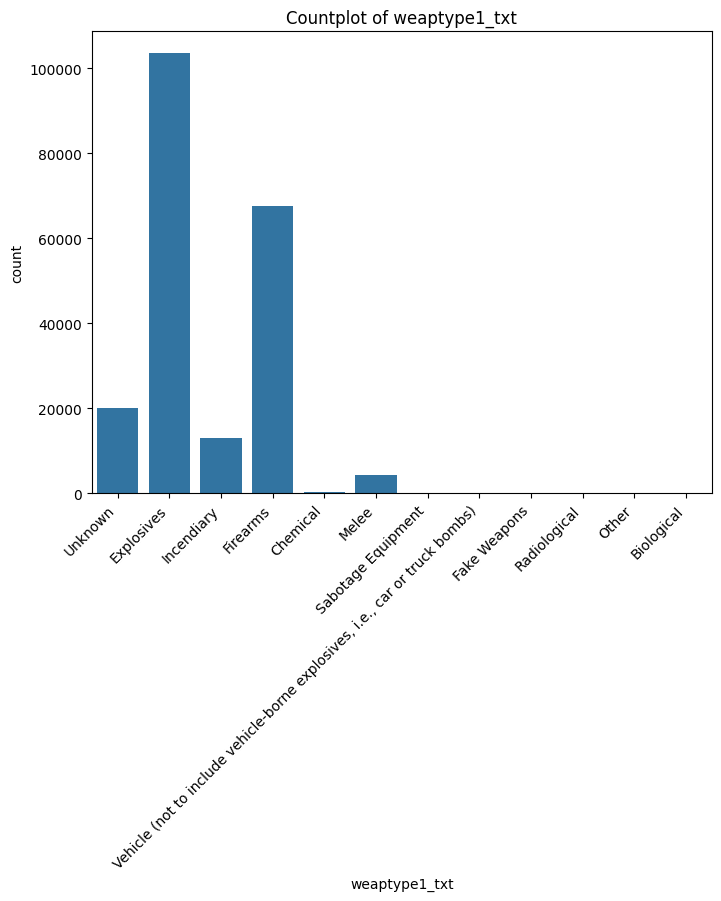

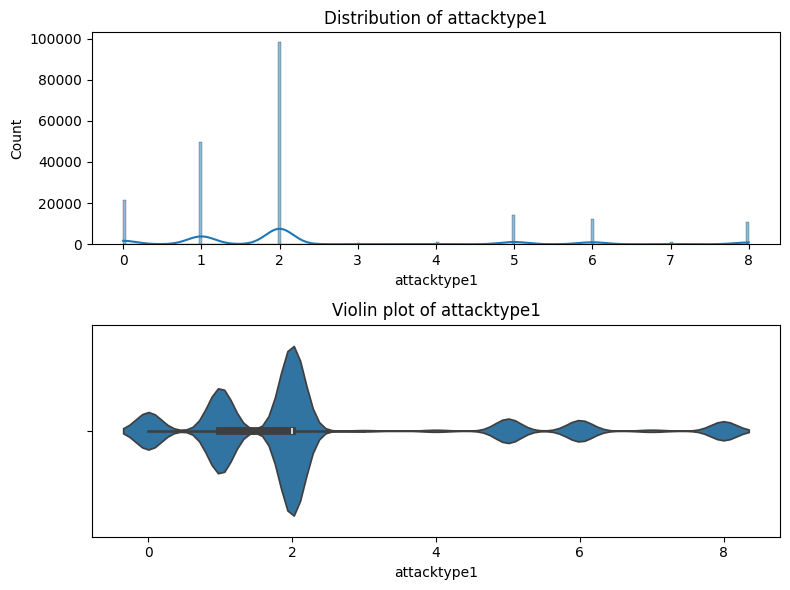

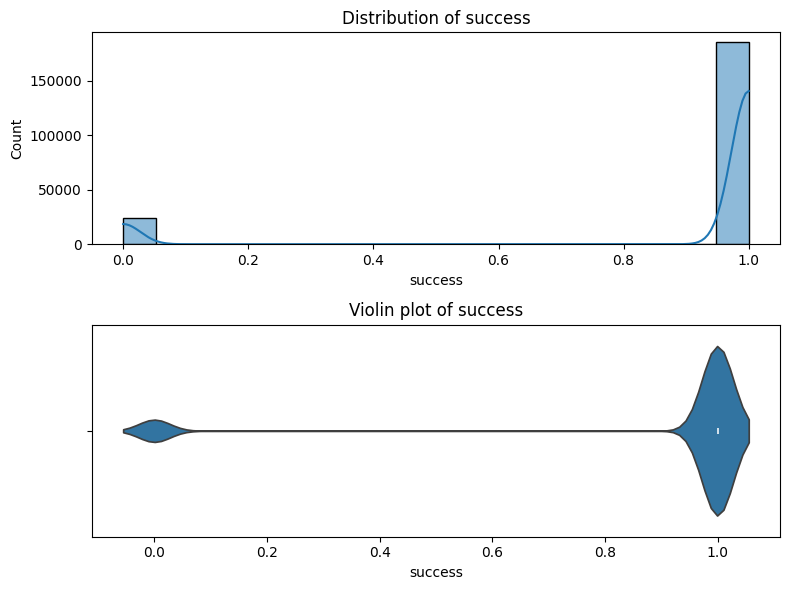

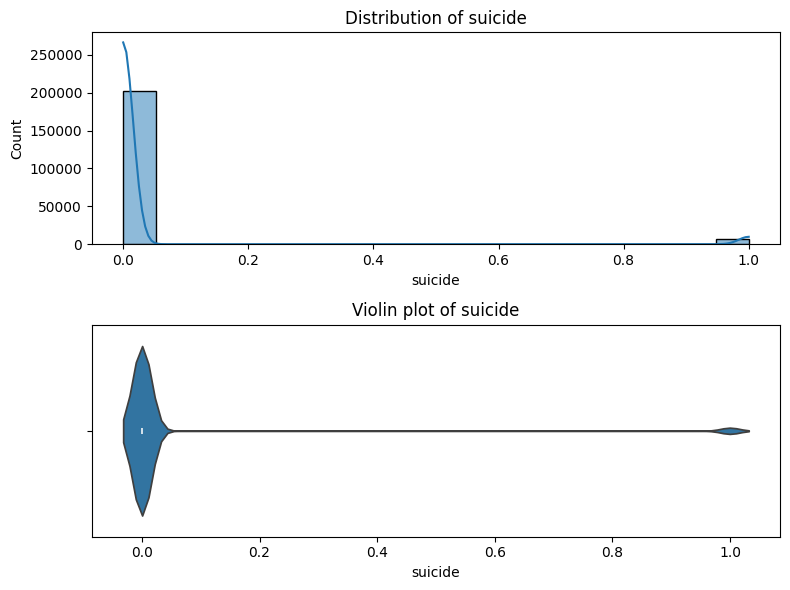

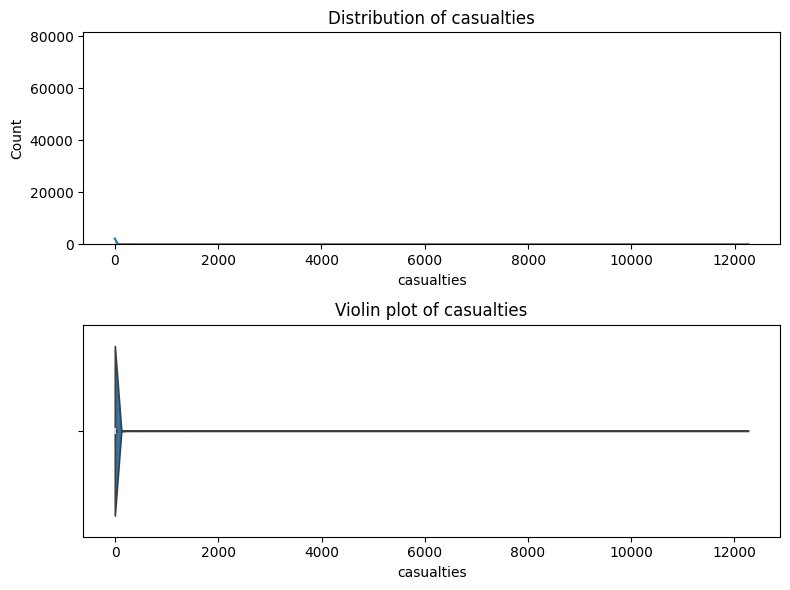

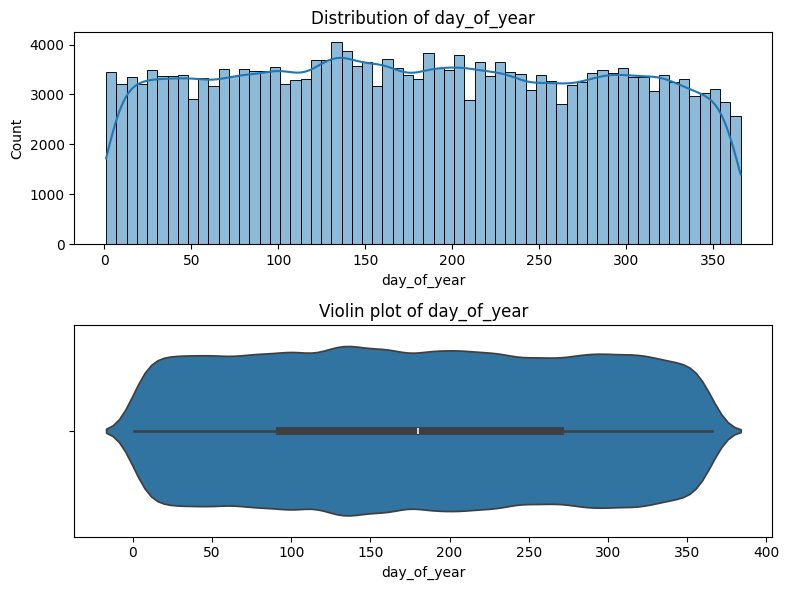

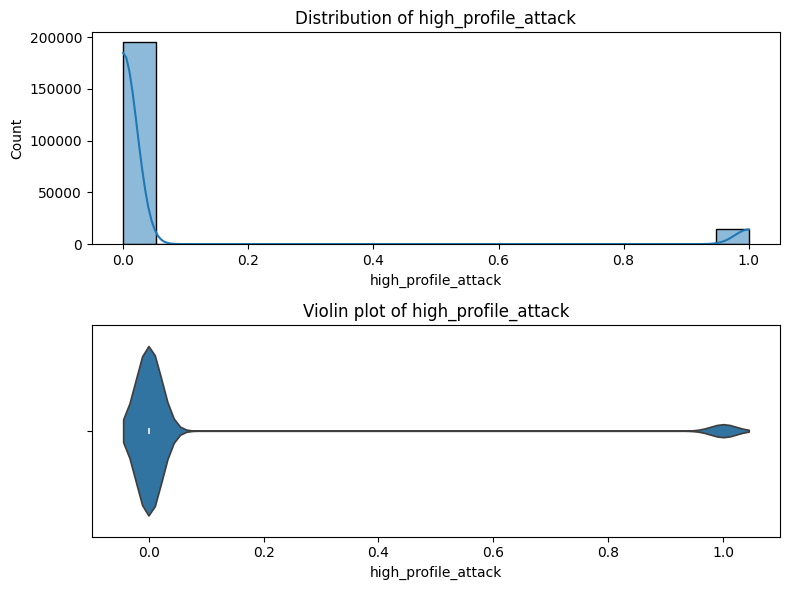

In [ ]:
# prompt: i want to create Correlation heatmap Distribution plots (histograms, boxplots) and other visualizations for the code that i have done above

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame 'df' is already created and preprocessed as in your code

# Correlation Heatmap
# Select only numeric features for correlation calculation
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr() # Calculate correlation for numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Distribution Plots (Histograms and Violin plots)
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Check if column is numeric
        plt.figure(figsize=(8, 6))

        # Histogram
        plt.subplot(2, 1, 1)  # Create subplots
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')

        # Violin plot
        plt.subplot(2, 1, 2)
        sns.violinplot(x=df[column]) # Using sns.violinplot instead of sns.boxplot
        plt.title(f'Violin plot of {column}')

        plt.tight_layout() # Adjust spacing between subplots
        plt.show()
    else: # Categorical columns
         plt.figure(figsize=(8, 6))
         sns.countplot(x=column, data=df)
         plt.title(f'Countplot of {column}')
         plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
         plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), ['casualties', 'day_of_year']),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), ['region_txt', 'country_txt', 'weaptype1_txt']),
    ('bin', 'passthrough', ['success', 'suicide', 'high_profile_attack'])
])


In [ ]:
from sklearn.metrics import classification_report  # Import classification_report

target_names = [str(label) for label in le.classes_]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.66      0.40      0.50      4308
           2       0.71      0.84      0.77      9911
           3       0.95      0.98      0.96     19632
           4       0.38      0.04      0.07       152
           5       0.18      0.01      0.02       231
           6       0.60      0.46      0.52      2809
           7       0.81      0.80      0.81      2465
           8       0.64      0.48      0.55       246
           9       0.76      0.86      0.80      2188

    accuracy                           0.82     41942
   macro avg       0.63      0.54      0.56     41942
weighted avg       0.81      0.82      0.81     41942



In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# XGBoost Pipeline
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', scale_pos_weight=1))
])

# Fit model
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_test)
#print(classification_report(y_test, y_pred, target_names=le.classes_))


target_names = [str(label) for label in sorted(set(y_test))]
print(classification_report(y_test, y_pred, target_names=target_names))



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.66      0.40      0.50      4308
           1       0.71      0.84      0.77      9911
           2       0.95      0.98      0.96     19632
           3       0.38      0.04      0.07       152
           4       0.18      0.01      0.02       231
           5       0.60      0.46      0.52      2809
           6       0.81      0.80      0.81      2465
           7       0.64      0.48      0.55       246
           8       0.76      0.86      0.80      2188

    accuracy                           0.82     41942
   macro avg       0.63      0.54      0.56     41942
weighted avg       0.81      0.82      0.81     41942



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBClassifier

cat_cols = ['region_txt', 'country_txt', 'weaptype1_txt']
num_cols = ['casualties', 'day_of_year']
bin_cols = ['success', 'suicide', 'high_profile_attack']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols),
    ('bin', 'passthrough', bin_cols)
])

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', scale_pos_weight=1)
pipeline = Pipeline(steps=[('prep', preprocessor), ('model', model)])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

# Updated preprocessing pipeline with imputation
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),  # Handles missing numerical values
        ('scaler', StandardScaler())
    ]), ['casualties', 'day_of_year']),

    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Handles missing categorical values
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), ['region_txt', 'country_txt', 'weaptype1_txt']),

    ('bin', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Handles missing binary values
        ('passthrough', 'passthrough')
    ]), ['success', 'suicide', 'high_profile_attack'])
])

# Updated Logistic Regression Pipeline
logreg_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000,
        random_state=42,
        class_weight='balanced'  # Helps with imbalanced classes
    ))
])

# Updated Random Forest Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42,
        class_weight='balanced_subsample',  # Handles class imbalance
        n_estimators=200  # Increased for better performance
    ))
])

# Fit and evaluate Logistic Regression
logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)

# Fit and evaluate Random Forest
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Binarize the output
    y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
    y_pred_prob = None

    if model_name == 'Logistic Regression':
        y_pred_prob = logreg_pipeline.predict_proba(X_test)
    elif model_name == 'Random Forest':
        y_pred_prob = rf_pipeline.predict_proba(X_test)

    roc_auc = roc_auc_score(
        y_true_bin,
        y_pred_prob,
        average='weighted',
        multi_class='ovr'
    )

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("-" * 20)

# Evaluate both models
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Logistic Regression Metrics:
Accuracy: 0.7044
Precision: 0.7593
Recall: 0.7044
F1-Score: 0.7224
Confusion Matrix:
[[ 1165  1112   566   192   719   207    28   132   187]
 [  835  5218   462   612  1621   393   481   279    10]
 [  584    66 18321   132   414    17    42    15    41]
 [    5    32    14    33    17    20     7     5    19]
 [   11    41    22     8   100    21    12     8     8]
 [   64   835    58   173   229   641    42   151   616]
 [   18   117     0    36    87    62  2021    36    88]
 [    1     0     0     6     0     2    15   222     0]
 [    2     0     0    70    54   238     0     0  1824]]
ROC AUC: 0.9314
--------------------
Random Forest Metrics:
Accuracy: 0.7790
Precision: 0.7795
Recall: 0.7790
F1-Score: 0.7791
Confusion Matrix:
[[ 2072  1269   487     9    35   240    41    18   137]
 [ 1515  6804   411    42   109   682   287    51    10]
 [  444   358 18651    17    42    53    39     4    24]
 [    9    45    16    14     3    37    17     1    10]

Accuracy: 0.8233751370940823
Precision: 0.811624947992382
Recall: 0.8233751370940823
F1-Score: 0.8111699357352402


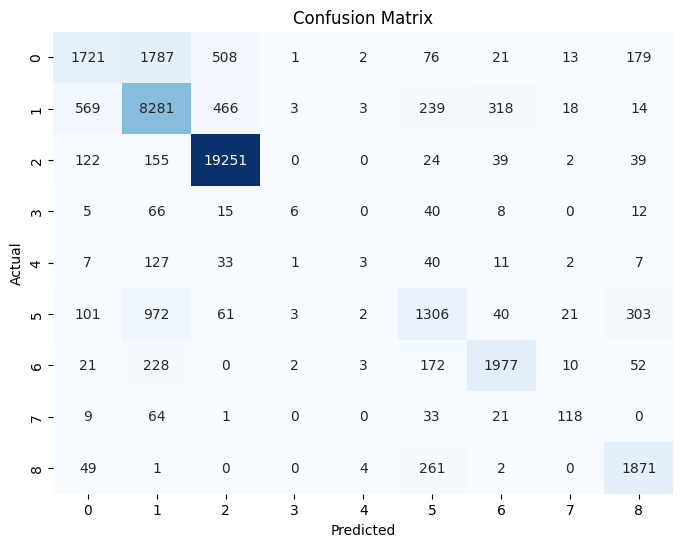

ROC AUC calculation failed. Ensure the model provides probability scores.
Error:Pipeline is not fitted yet.


In [ ]:
# prompt: i need to calculate the accuracy, precision, recall, f1-score, confusion matrix, auc roc for my ml model
# for the confusion matrix also create a diagram

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Assuming y_test and y_pred are already defined from your model's predictions
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use weighted for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC AUC (requires probability scores, not just class predictions)
try:
  y_prob = pipeline.predict_proba(X_test)
  roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr') # Use 'ovr' for multi-class
  print(f"ROC AUC: {roc_auc}")

  # Plot ROC curve (example for binary classification, adapt for multi-class)
  fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1], pos_label=1) # Assuming binary classification
  plt.plot(fpr, tpr)
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.show()
except Exception as e:
  print("ROC AUC calculation failed. Ensure the model provides probability scores.")
  print(f"Error:{e}")


In [ ]:
!pip install shap
import shap

# Assuming 'pipeline' is your fitted pipeline (from previous cells)

# Fit the pipeline with your training data (if not already done)
# pipeline.fit(X_train, y_train)  # Uncomment if the pipeline hasn't been fitted

# Get the trained model from the pipeline
xgb_model = pipeline.named_steps['model']  # Use the correct step name from your pipeline

# Now create the explainer after the model is fitted
explainer = shap.Explainer(xgb_model)

# Use the transformed data (X_test_transformed) for SHAP values
shap_values = explainer(X_test_transformed)

# Use get_feature_names_out() to get the feature names after transformation
shap.summary_plot(shap_values, features=X_test_transformed, feature_names=preprocessor.get_feature_names_out())

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
feature_names = preprocessor.get_feature_names_out()


In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_transformed, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:15:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

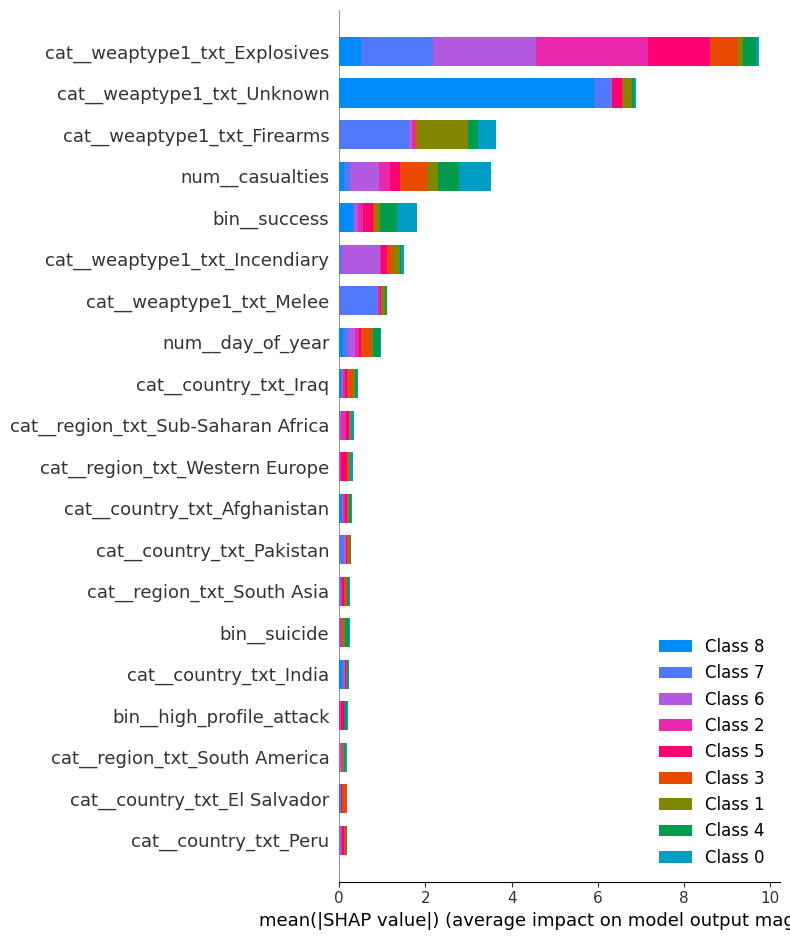

In [ ]:
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test_transformed)

shap.summary_plot(shap_values, features=X_test_transformed, feature_names=feature_names)
